In [123]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tqdm import tqdm

In [25]:
G1=(lambda x1,x2,x3,x4:x1**2+x2**2+x3**2+x4**2-1)


In [26]:
G1(1,1,1,1)

3

In [27]:
def GetVectorF(G,r):
    
    
    v = np.zeros(1)
    
    v[0] = G(r[0],r[1],r[2],r[3])
        
    return v


In [30]:
GetVectorF(G1,[1,0,0,1])

array([1.])

In [73]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [72]:
def GetJacobian(G,r,h=1e-6):
    
    J = np.zeros((1,4))
    
    J[0,0] = (  G(r[0]+h,r[1],r[2],r[3]) - G(r[0]-h,r[1],r[2],r[3]) )/(2*h)
    J[0,1] = (  G(r[0],r[1]+h,r[2],r[3]) - G(r[0],r[1]-h,r[2],r[3]) )/(2*h)
    J[0,2] = (  G(r[0],r[1],r[2]+h,r[3]) - G(r[0],r[1],r[2]-h,r[3]) )/(2*h)
    J[0,3] = (  G(r[0],r[1],r[2],r[3]+h) - G(r[0],r[1],r[2],r[3]-h) )/(2*h)
        
    return J.T

In [49]:
GetMetric(G1,[1,-0.5,0,1])

0.78125

In [9]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X1','X2','X3','X4']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [125]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7,visualize=False):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        if NewF != 0:
            d = np.abs( CurrentF - NewF )/NewF
        else:
            d = 0
        
        if it%500 == 0 and visualize:
            
            #print(it,d)
            clear_output(wait=True)
            GetFig(Vector_F,R_vector,it)
            time.sleep(0.01)
        it += 1
        
    if d < error and visualize:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs and visualize:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

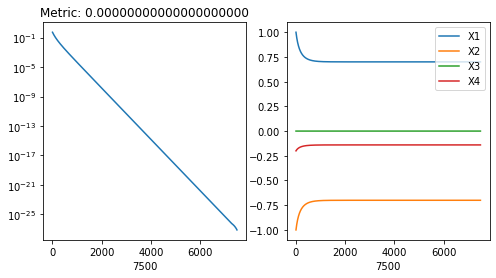

 Entrenamiento completo  0.0 iteraciones 7502


In [102]:
xsol,it,F,R = GetSolve(G1,np.array([1,-1,0,-0.2]),lr=1e-3,visualize = True)

In [97]:
xsol

array([ 0.70014004, -0.70014004,  0.        , -0.14002801])

In [106]:
xsol,it,F,R = GetSolve(G1,[0,0,0,0.1],lr=1e-3)

 Entrenamiento completo  0.0 iteraciones 8911


In [107]:
xsol

array([0., 0., 0., 1.])

In [126]:
N = int(1e3)
sphere = np.zeros([N,4])
for i in tqdm(range(N)):
    rand_point = np.random.uniform(-1,1,4)
    sol,_,_,_ = GetSolve(G1,rand_point,lr=1e-3)
    sphere[i,:] = sol
    
    

100%|██████████| 1000/1000 [09:05<00:00,  1.83it/s]


In [128]:
metrics = np.zeros(N)
for i in range(N):
    metrics[i] = GetMetric(G1,sphere[i,:])

In [129]:
sum_ = np.sum(metrics)

In [132]:
sum_

2.142242926214114e-24

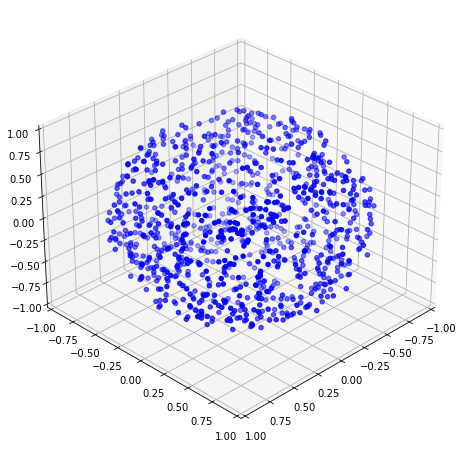

In [135]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')
X = sphere[:,0]
Y = sphere[:,1]
Z = sphere[:,2]
#configurar límites de los ejes
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(30, 45)

ax.scatter(X,Y,Z,color='b')